# TikTok imports

In [2]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import time
from tqdm.auto import tqdm

import requests
from datetime import datetime

In [3]:
import numpy as np

In [4]:
!pip install ensembledata
from ensembledata.api import EDClient

# Read comments from TikTok

In [ ]:
posts = pd.read_csv('milton_posts.csv')
comments = pd.read_csv('milton_comments.csv')

In [ ]:
posts

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7456619275089120558,2025-01-06,7267744409029100587,Hurricane Milton 🌪️ The Most Dangerous Storm o...,['https://v77.tiktokcdn-eu.com/3de54216b6c039c...,2,4324,2
1,7424050905537924384,2024-10-10,6953176899251241989,It's not yet clear how severe the storm surges...,['https://v77.tiktokcdn-eu.com/b4181084d70e7a6...,7290,3528599,1088
2,7424195080220577057,2024-10-10,7333281056634012704,Hurricane 🌪️ Milton Florida USA 🌪️ #hurricane ...,['https://v77.tiktokcdn-eu.com/6a91fad127dc06f...,308,66659,73
3,7423997114159615250,2024-10-10,6550075937672527874,Hurricane Milton damages 😔 #milton #hurricane ...,['https://v77.tiktokcdn-eu.com/8910008dc35e305...,166,126743,31
4,7426852505096703265,2024-10-17,6754664095708808197,HURRICANE MILTON HACK!😱(follow for more!) #hur...,['https://v77.tiktokcdn-eu.com/2d475fed9e8ecda...,116,436199,40
...,...,...,...,...,...,...,...,...
3390,7423907649692945706,2024-10-09,6721831867404682245,"ALL Ali Beauty Supply locations are open, regu...",['https://v16m.tiktokcdn-eu.com/b30fda14757c5a...,72,244755,53
3391,7423936588104666399,2024-10-10,7059830645314946095,At least a dozen tornadoes tore through Florid...,['https://api16-normal-c-useast2a.tiktokv.com/...,1081,466649,140
3392,7424137850112724255,2024-10-10,6809005906757977094,#hurricanemilton #hurricane #milton #capecoral...,['https://v16m.tiktokcdn-eu.com/1d9870316418da...,355,129905,1887
3393,7423895352870276383,2024-10-09,6644140971506941957,#jynxzi #hurricane #hurricanemilton #chall #r6...,['https://sf16-ies-music.tiktokcdn.com/obj/ies...,972,141375,182


In [ ]:
posts = posts[(posts["createTime"] >= "2024-09-26") & (posts["createTime"] <= "2024-11-09")]

In [ ]:
posts["createTime"].unique()

array(['2024-10-10', '2024-10-17', '2024-10-09', '2024-10-11',
       '2024-10-16', '2024-10-07', '2024-10-08', '2024-10-12',
       '2024-10-13', '2024-10-06', '2024-10-20', '2024-11-07',
       '2024-11-06', '2024-10-27', '2024-10-14', '2024-10-19',
       '2024-10-18', '2024-10-05', '2024-10-15', '2024-11-05',
       '2024-11-09', '2024-10-26', '2024-10-21', '2024-11-08',
       '2024-11-04', '2024-10-31', '2024-10-29', '2024-10-30',
       '2024-10-24', '2024-10-28', '2024-11-03', '2024-10-22',
       '2024-11-02', '2024-10-04'], dtype=object)

In [ ]:
# order df_hashtag by date
posts = posts.sort_values(by=['createTime'], ascending=True).reset_index(drop=True)

posts

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7421965835071180062,2024-10-04,7159196409403556906,10/4 pm. latest GFS has possible hurricane Tue...,['https://v45.tiktokcdn-eu.com/d874276342da953...,5577,527233,673
1,7422329569190874398,2024-10-05,7159196409403556906,NaN,['https://v58.tiktokcdn-eu.com/video/tos/maliv...,19077,2252822,4165
2,7422434415600520494,2024-10-05,6918102477620397062,Hurricane Milton could you just like calm tf d...,['https://sf16-ies-music-sg.tiktokcdn.com/obj/...,3752,419642,326
3,7422409917908241706,2024-10-05,7316718683090011179,Credit: @hector✝️ Florida had helene and now ...,['https://v16m.tiktokcdn-eu.com/848ac9b84ee847...,7845,272549,1299
4,7422308862344138026,2024-10-05,7097557512820393003,#hurricane #hurricaneseason #hurricanes #tropi...,['https://sf16-ies-music-sg.tiktokcdn.com/obj/...,11435,354702,1821
...,...,...,...,...,...,...,...,...
3365,7434409917529869611,2024-11-07,7296649090526938154,Freaky ass fruit #fruitposting #fyp #foryoup #...,['https://v15m.tiktokcdn-eu.com/d94fc67f9029e4...,32380,405259,697
3366,7434395515745324330,2024-11-07,7296649090526938154,Good work. #fruitposting #fyp #foryoup #hopeco...,['https://v39-dynamic-eu-fra1.tiktokcdn-eu.com...,129908,1621142,2439
3367,7434726272627969323,2024-11-08,6946220746192700421,YouTube: “Meechie & Jakaya”🚨💙 #meechieandjaka...,['https://v77.tiktokcdn-eu.com/c2e1a748f8b7a50...,14561,375035,600
3368,7434806050483621166,2024-11-08,7250708041966978090,#DAVIDMUIR + HAPPY BIRTHDAY DAVID MUIR (time f...,['https://v77.tiktokcdn-eu.com/906e6fd37631527...,2413,68922,410


## Graph with comulated comments per day, Milton posts

In [ ]:
dates=posts["createTime"].unique()
cumcomments=[]
for date in dates:
  cumcomments.append(posts[posts["createTime"]==date]["commentCount"].sum())
cumcomments

[673,
 25862,
 171529,
 537728,
 1188033,
 1626162,
 988616,
 344126,
 128460,
 33617,
 24901,
 17910,
 19462,
 6935,
 5938,
 2503,
 12521,
 2281,
 151,
 812,
 201,
 1509,
 184,
 282,
 739,
 1127,
 208,
 381,
 4479,
 1264,
 3678,
 3401,
 1010,
 569]

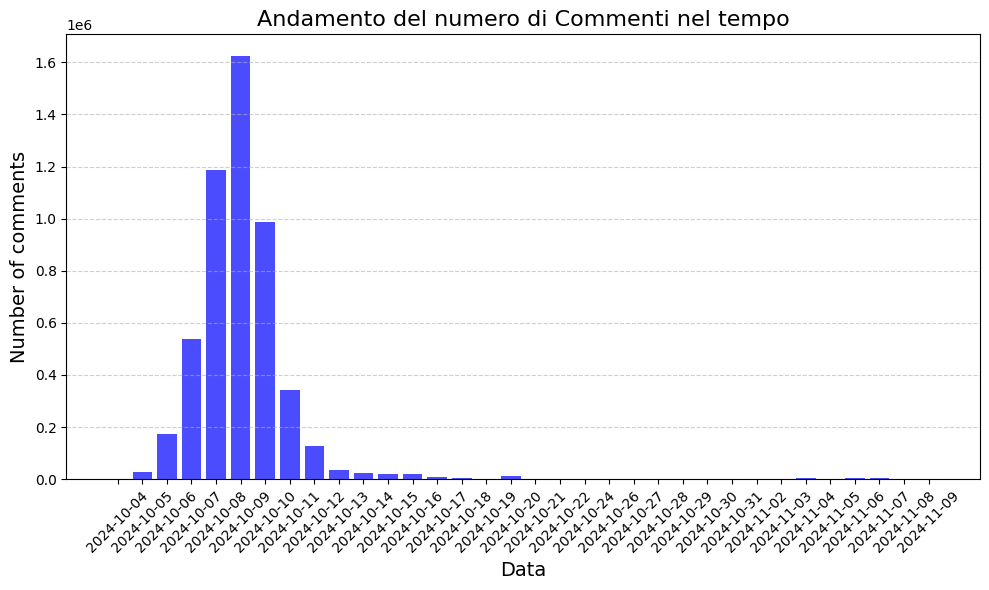

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(dates, cumcomments, color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Cumulated comments per day', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Cumulated comments', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

## Cumulated share count and play count

In [ ]:
cumshares=[]
for date in dates:
  cumshares.append(posts[posts["createTime"]==date]["shareCount"].sum())

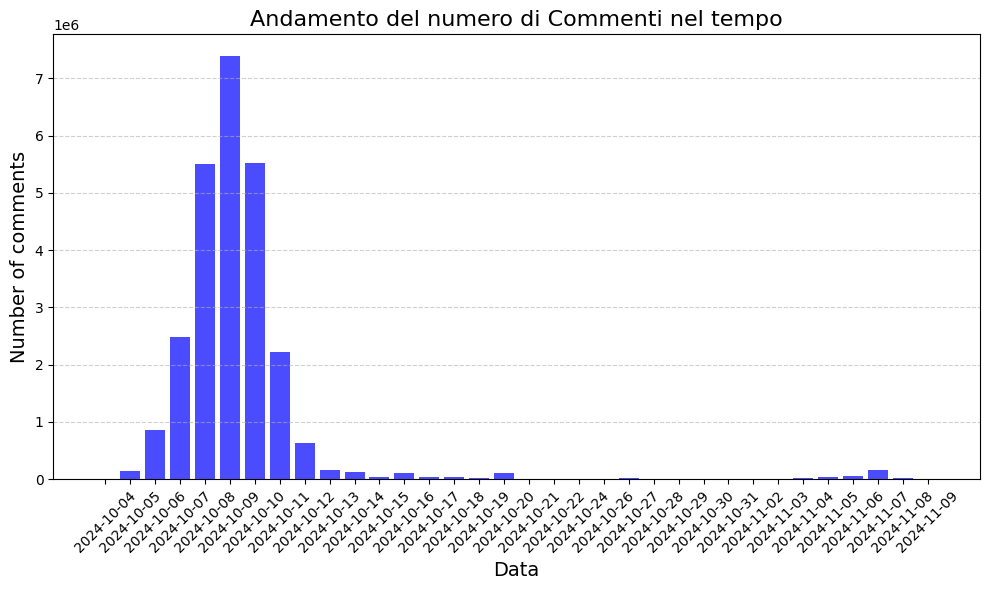

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(dates, cumshares, color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Cumulated shares per day', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Cumulated shares', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

In [ ]:
cumplays=[]
for date in dates:
  cumplays.append(posts[posts["createTime"]==date]["playCount"].sum())

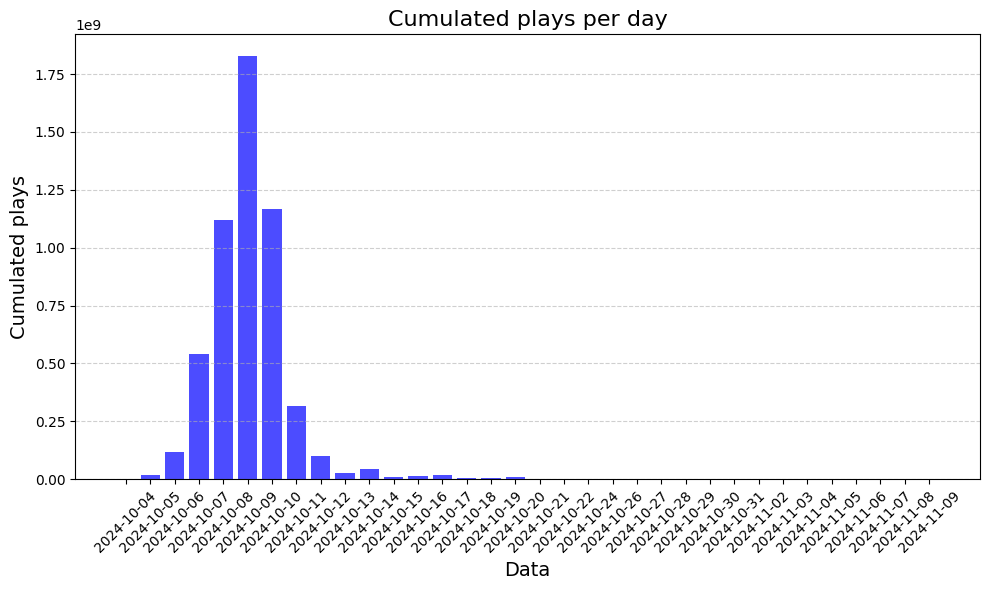

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(dates, cumplays, color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Cumulated plays per day', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Cumulated plays', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

# Analysis for climate change posts

## Milton

In [5]:
posts = pd.read_csv('climatechange_milton_posts.csv')
comments = pd.read_csv('climatechange_milton_comments.csv')

In [12]:
# order df_hashtag by date
posts = posts.sort_values(by=['createTime'], ascending=True).reset_index(drop=True)
posts

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7418351787310173448,2024-09-25,6870434060310479874,ขยะล้นโรงเรียนบ้านขุนสมุทร ใครเป็นคนทำ???? . เ...,['https://v45.tiktokcdn-eu.com/824f05ca87f9269...,587,1161490,143
1,7418471943105481989,2024-09-25,7199993339961230337,Biodiversity is the foundation of life! Protec...,['https://v16m.tiktokcdn-eu.com/21cc30a0701736...,763,5339057,62
2,7418938218705358113,2024-09-26,6921425241210192897,🌱 Just when you thought it couldn’t get any gr...,['https://v77.tiktokcdn-eu.com/7e92bcbfcf73b54...,540,878745,432
3,7418978793169194271,2024-09-26,6738719386117358598,Come mi preparo per un uragano? . #helene #ura...,['https://v16m.tiktokcdn-eu.com/4aeed0f5a11d3a...,809,1159510,197
4,7419084546546683141,2024-09-26,6918087364695786502,Vengan ayudar a sacar el agua y les damos mezc...,['https://v77.tiktokcdn-eu.com/d774b9b0da52364...,25405,1016951,264
...,...,...,...,...,...,...,...,...
148,7434632512497863979,2024-11-08,6696172485580637189,2024 is set to be the hottest in Earth's recor...,['https://v77.tiktokcdn-eu.com/3742f0191d130ff...,5970,2262710,5208
149,7434768906985737515,2024-11-08,20825279,"dear earth, i love you and i’m sorry we failed...",['https://v15m.tiktokcdn-eu.com/8f0f30f53cc41b...,152,58244,223
150,7434719328009882926,2024-11-08,7099588140478874670,lord help us. #trump #fineshyt #climatechange ...,['https://sf16-ies-music.tiktokcdn.com/obj/ies...,10876,614284,650
151,7434959421249293598,2024-11-08,7293399917392593962,I have learned over the years to not let polit...,['https://v19-perf.tiktokcdn-eu.com/9bd277691e...,4494,867577,962


In [37]:
cumshares=[]
dates=posts["createTime"].unique()
for date in dates:
  cumshares.append(posts[posts["createTime"]==date]["shareCount"].sum())

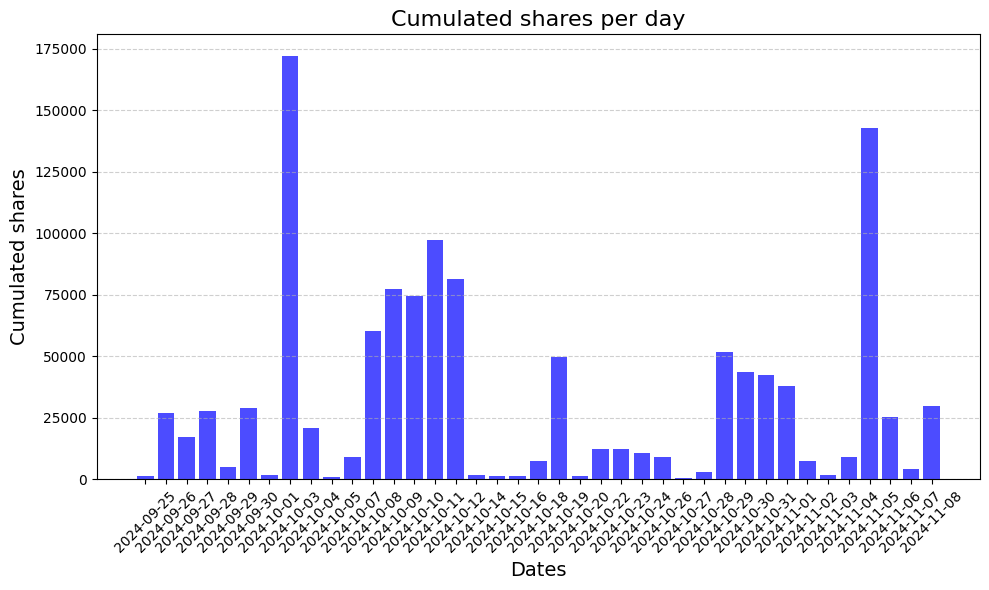

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(dates, cumshares, color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Cumulated shares per day', fontsize=16)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Cumulated shares', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

In [41]:
cumplays=[]
for date in dates:
  cumplays.append(posts[posts["createTime"]==date]["playCount"].sum())

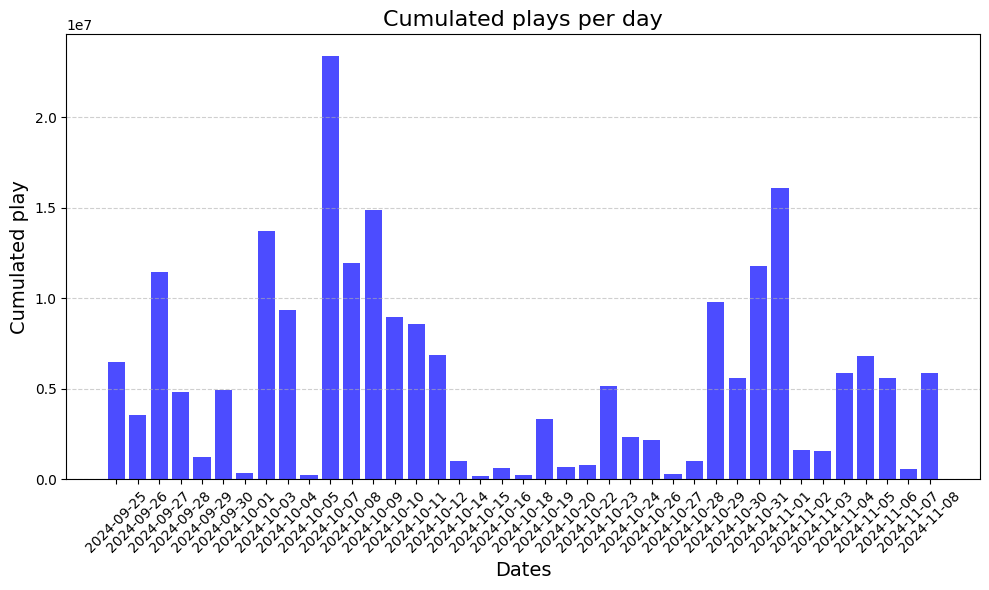

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(dates, cumplays, color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Cumulated plays per day', fontsize=16)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Cumulated play', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

In [38]:
cumposts=[]
for date in dates:
  cumposts.append(len(posts[posts["createTime"]==date]))

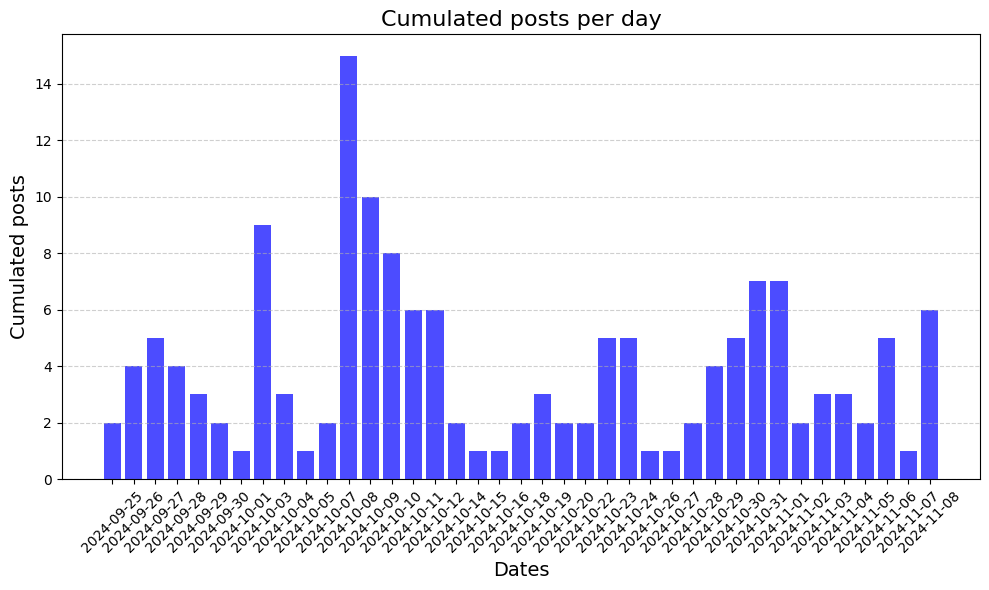

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(dates, cumposts, color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Cumulated posts per day', fontsize=16)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Cumulated posts', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

## Milton Comments

In [25]:
comments

,aweme_id,cid,create_time,text,reply_comment_total
0,7418351787310173448,7418550019215901448,2024-09-25,รร.ย้ายแล้วสามรอบ ห้ะ!!,1
1,7418351787310173448,7418366951141966599,2024-09-25,เคยไปค่ะ หนังสือ ก็ชื้นมาก ห้องสมุดสาธารณะต้อง...,1
2,7418351787310173448,7418449495128539911,2024-09-25,1ขยะ 2น้ำขึ้นเรื่อยๆ จะทำไงดี,2
3,7418351787310173448,7418481008158786311,2024-09-25,คนเก็บของเก่าไปเห็บมาขายด่วน,1
4,7418351787310173448,7418562373675746053,2024-09-25,โรงเรียนตั้งอยู่ที่ไหนครับ,2
...,...,...,...,...,...
728,7425036749019172128,7452824786252579616,2024-12-26,when will this happen,1
729,7428899122347773205,7452538870593422100,2024-12-26,kawawa namn,0
730,7430783802944851232,7452576823118660374,2024-12-26,rip,0
731,7429377005856083243,7452517649910678294,2024-12-26,if UN warns about this why is in Fahrenheit no...,0


In [34]:
comments = comments.sort_values(by=['create_time'], ascending=True).reset_index(drop=True)
cumcomments=[]
dates=comments["create_time"].unique()
for date in dates:
  cumcomments.append(len(comments[comments["create_time"]==date]))

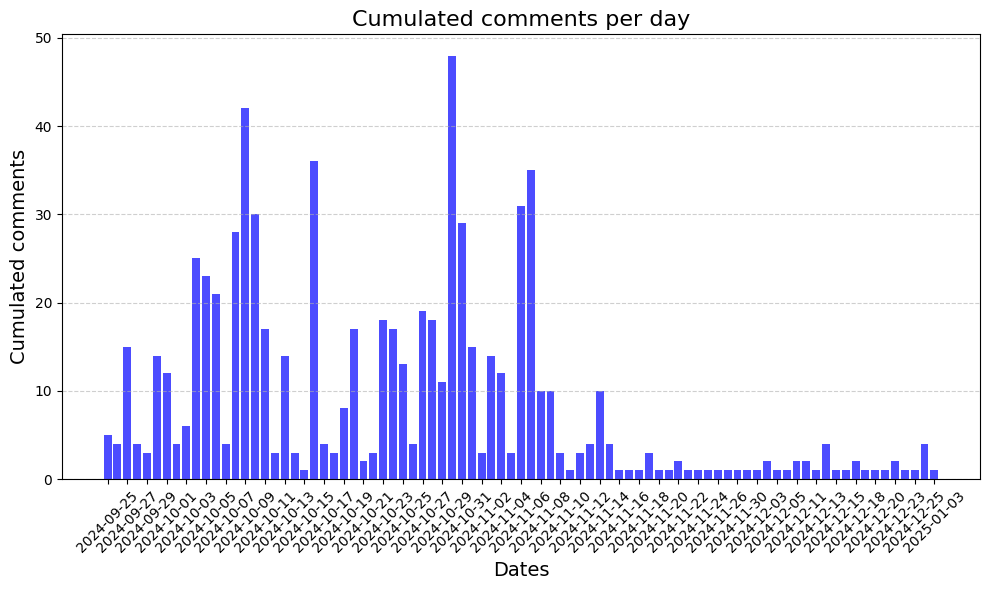

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(dates, cumshares, color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Cumulated comments per day', fontsize=16)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Cumulated comments', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(ticks=range(0, len(dates), 2), labels=dates[::2], rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

## Idalia

In [45]:
posts = pd.read_csv('cilmatechange_idalia_posts1.csv')
comments = pd.read_csv('climatechange_idalia_comments.csv')

In [52]:
posts = posts.sort_values(by=['createTime'], ascending=True).reset_index(drop=True)
cumshares=[]
dates=posts["createTime"].unique()
for date in dates:
  cumshares.append(posts[posts["createTime"]==date]["shareCount"].sum())

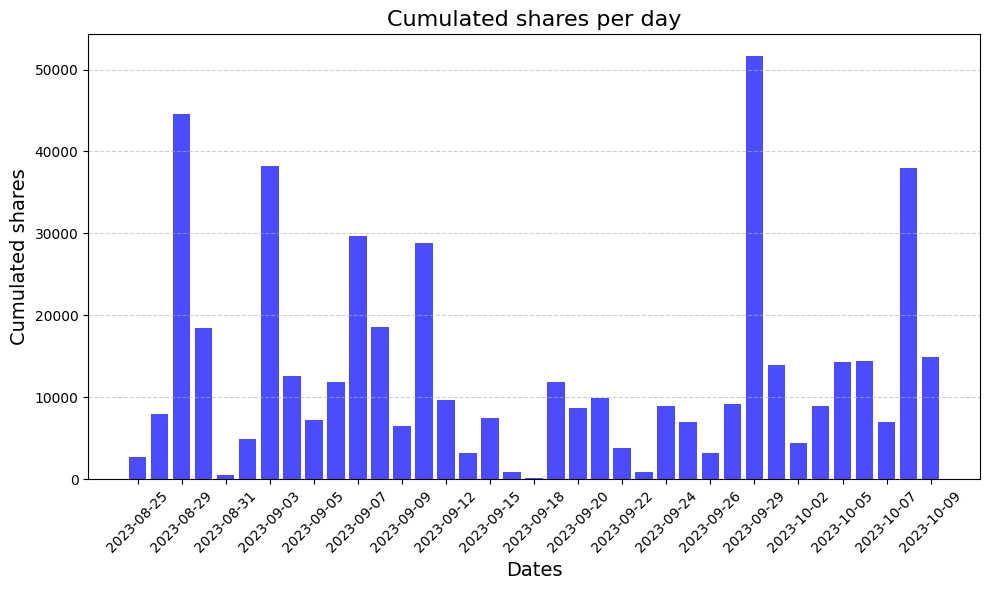

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(dates, cumshares, color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Cumulated shares per day', fontsize=16)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Cumulated shares', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(ticks=range(0, len(dates), 2), labels=dates[::2], rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

In [54]:
cumposts=[]
dates=posts["createTime"].unique()
for date in dates:
  cumposts.append(len(posts[posts["createTime"]==date]))

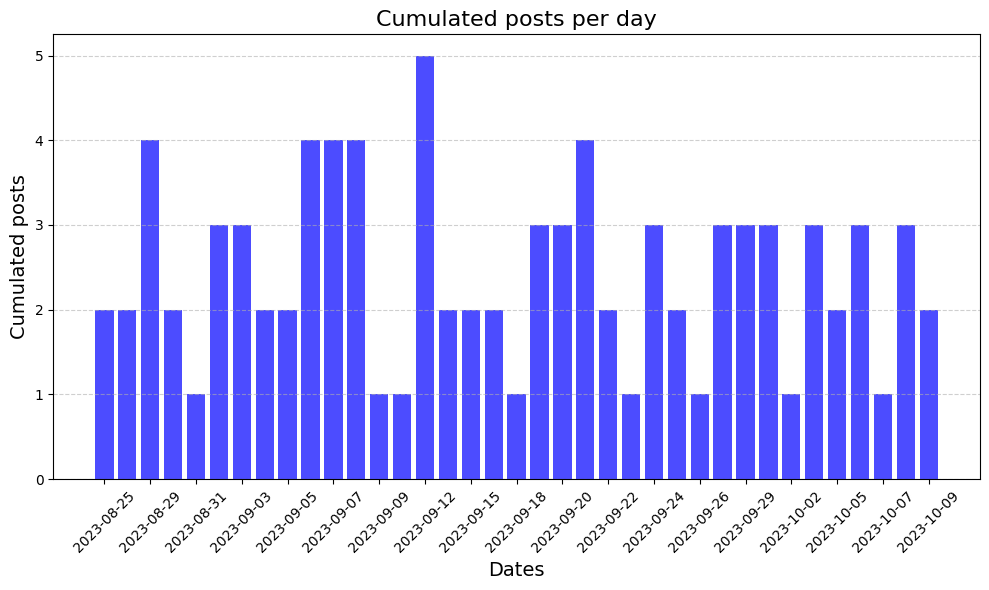

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(dates, cumposts, color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Cumulated posts per day', fontsize=16)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Cumulated posts', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(ticks=range(0, len(dates), 2), labels=dates[::2], rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

## Ian

In [62]:
posts = pd.read_csv('cilmatechange_ian_posts1.csv')
comments = pd.read_csv('climatechange_ian_comments.csv')

In [68]:
# order df_hashtag by date
posts = posts.sort_values(by=['createTime'], ascending=True).reset_index(drop=True)
posts

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7143360142632045870,2022-09-14,6868749108023690245,Some #goodnews for anyone who cares about #cli...,['https://v77.tiktokcdn-eu.com/7f0fbea8822598c...,8837,681723,1640
1,7143125920931515650,2022-09-14,7056975949636224001,La Niña is back for a third year in a row #aus...,['https://v77.tiktokcdn-eu.com/ff0fdfc78c0b405...,4742,1075369,4482
2,7143344050417077509,2022-09-14,6606355564501762053,#mtl was fun yesterday!! #mtltiktok #rain#inno...,['https://v45.tiktokcdn-eu.com/f3d7c26e70c11f0...,4790,5864927,4970
3,7143651304454311214,2022-09-15,6732956996381639685,companies that give a shit about the world🥹 #p...,['https://v77.tiktokcdn-eu.com/89ba0c502cba32f...,129,270300,37
4,7143640335418232106,2022-09-15,7038626192992420869,#flatearth #nasa #fyp #globalwarming #climatec...,['https://v58.tiktokcdn-eu.com/video/tos/maliv...,1367,1181701,916
...,...,...,...,...,...,...,...,...
111,7159681803257662762,2022-10-28,7082830800441951278,Climate action is fiscally responsible. #clima...,['https://v77.tiktokcdn-eu.com/fa052ad776e0027...,386,400246,993
112,7159623028815564078,2022-10-28,6771509637109974022,my halloween costume: the scariest thing on pl...,['https://v58.tiktokcdn-eu.com/video/tos/maliv...,1035,709419,305
113,7159585986551270662,2022-10-28,6823546303419663365,التكنولوچيا سلاح بخمس ست حدود ⚔️ #لازم_تعرفها ...,['https://v77.tiktokcdn-eu.com/e853f4df733150a...,1160,26242574,681
114,7159544220821245189,2022-10-28,6779237083670053894,التغيرات المناخية #climatechange \n#ClimateAct...,['https://v16m.tiktokcdn-eu.com/eb2948c67f6b31...,1156,18182087,426


In [69]:
cumposts=[]
dates=posts["createTime"].unique()
for date in dates:
  cumposts.append(len(posts[posts["createTime"]==date]))

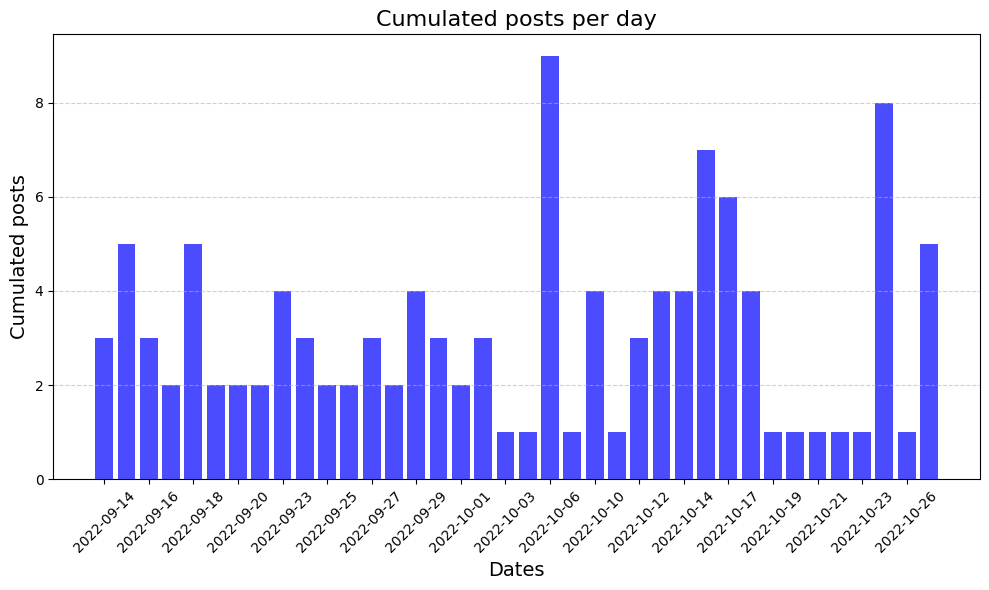

In [70]:
plt.figure(figsize=(10, 6))
plt.bar(dates, cumposts, color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Cumulated posts per day', fontsize=16)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Cumulated posts', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(ticks=range(0, len(dates), 2), labels=dates[::2], rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

In [71]:
cumshares=[]
dates=posts["createTime"].unique()
for date in dates:
  cumshares.append(posts[posts["createTime"]==date]["shareCount"].sum())

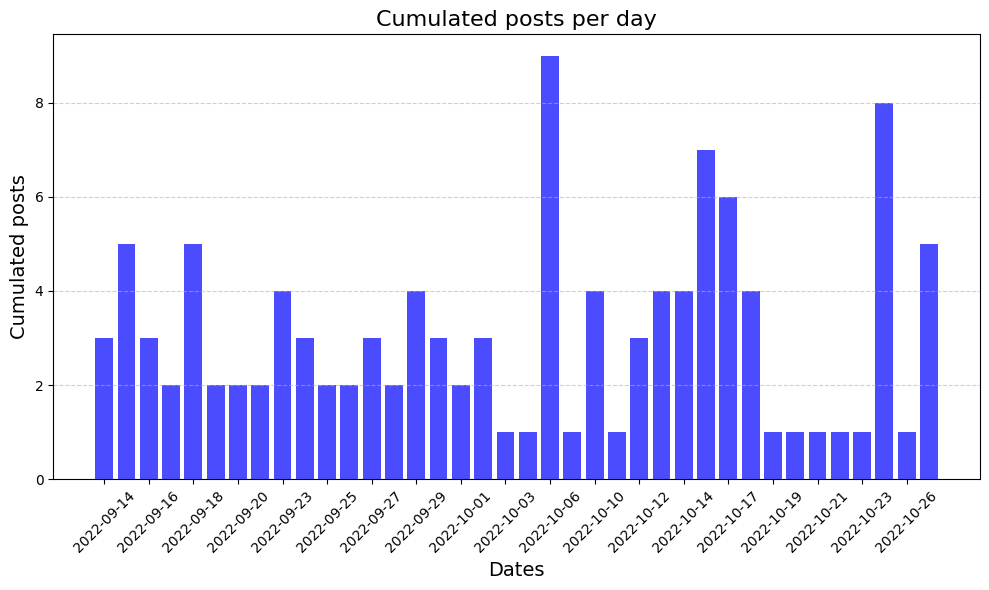

In [72]:
plt.figure(figsize=(10, 6))
plt.bar(dates, cumposts, color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Cumulated posts per day', fontsize=16)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Cumulated posts', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(ticks=range(0, len(dates), 2), labels=dates[::2], rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

# Comments

In [ ]:
comments

,aweme_id,cid,create_time,text,reply_comment_total
0,7424419750303878408,7424772903915258631,2024-10-12,1. milton - due to heating up of earth.\n2. sa...,1633
1,7422814373627940139,7422835309627097887,2024-10-07,if you can make it to SC my home is open to yo...,693
2,7426167450623954207,7426193868028527403,2024-10-16,"Question, why is it the American government al...",426
3,7423940143821770026,7424410768140124961,2024-10-11,Trump gave about 25 millions to home owners wh...,388
4,7423123307991502123,7423173584540123946,2024-10-07,How are they gonna help us??? They don’t have ...,371
...,...,...,...,...,...
608,7432883698195795242,7433243465687335723,2024-11-04,gone on shake them sheets out..😂,0
609,7432883698195795242,7434387988442284830,2024-11-07,I will change everything I don't care what tim...,0
610,7432883698195795242,7434361939549930286,2024-11-07,Lol I hate that but I still eat potato chips i...,0
611,7425693857322437921,7459884818122916641,2025-01-14,HAVE U SEEN THE LA AND CALIFORNIA,0


In [ ]:
comments = comments[(comments["create_time"] >= "2024-09-26") & (comments["create_time"] <= "2024-11-09")]

In [ ]:
# order df_hashtag by date
comments = comments.sort_values(by=['create_time'], ascending=True).reset_index(drop=True)

In [ ]:
dates=comments["create_time"].unique()
cumcomments=[]
for date in dates:
  cumcomments.append(comments[comments["create_time"]==date]["reply_comment_total"].sum())
cumcomments

[65,
 1340,
 3,
 3400,
 633,
 899,
 135,
 843,
 2079,
 228,
 14,
 1965,
 3,
 290,
 10,
 57,
 303,
 18,
 2,
 6,
 40,
 6,
 4,
 14,
 36,
 4,
 14,
 6,
 27,
 34,
 5,
 14,
 114,
 404,
 60,
 40]

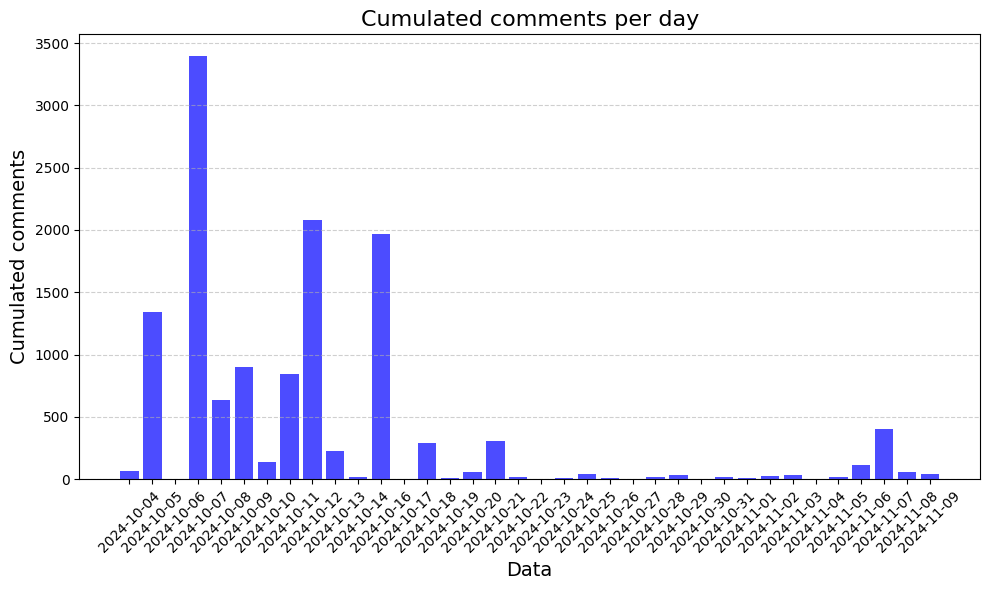

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(dates, cumcomments, color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Cumulated comments per day', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Cumulated comments', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

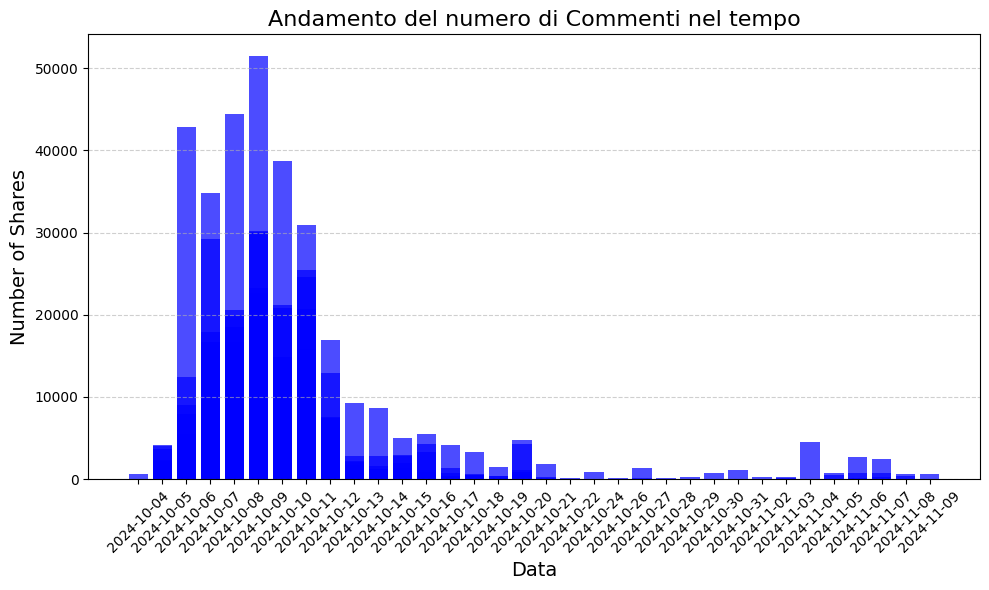

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(posts["createTime"], posts["commentCount"], color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Andamento del numero di Commenti nel tempo', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Number of comments', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

In [ ]:
df_hashtag["createTime"].unique()

array(['2022-10-28', '2022-10-24', '2022-10-17', '2022-10-19',
       '2022-10-02', '2022-09-15', '2022-09-24', '2022-09-23',
       '2022-10-16', '2022-10-13', '2022-09-14', '2022-09-17',
       '2022-09-28', '2022-09-18', '2022-09-30', '2022-10-14',
       '2022-10-20', '2022-10-05', '2022-10-01', '2022-09-29',
       '2022-10-12', '2022-09-27', '2022-10-18', '2022-09-20',
       '2022-10-10', '2022-10-06', '2022-10-26', '2022-10-03',
       '2022-09-26', '2022-09-25', '2022-10-11', '2022-10-08',
       '2022-09-21', '2022-09-16', '2022-10-22', '2022-10-21',
       '2022-09-19', '2022-10-23'], dtype=object)

Comments search

In [ ]:
# order by comment count
df_hashtag = df_hashtag.sort_values(by=['commentCount'], ascending=False).reset_index(drop=True)

# delete posts with less than 30 comments
df_hashtag = df_hashtag[df_hashtag['commentCount']>=30]

# state how many
print(f'{len(df_hashtag)} posts for hashtags with more than 30 comments')


115 posts for hashtags with more than 30 comments


In [ ]:
display(df_hashtag)

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7157913634226654466,2022-10-24,6743464067279258629,"What will be next, spaghetti on a Picasso? 🖼️ ...",['https://v77.tiktokcdn-eu.com/66cf68b35befcb0...,5343,6377039,12498
1,7154373264914009350,2022-10-14,7053420124242658310,Just Stop Oil activists have spray painted the...,['https://v16m.tiktokcdn-eu.com/930dffca32dcdd...,2814,2277992,9159
2,7146900341810810139,2022-09-24,6928760643127264258,#ประโยชน์ ของการ #กินมื้อเดียว #ยิ่งหิวยิ่งสุข...,['https://v16m.tiktokcdn-eu.com/82e50c52524649...,22104,4328532,6987
3,7156301698414284037,2022-10-19,6886828060440937477,The climate activist who threw soup over Vince...,['https://v77.tiktokcdn-eu.com/815bf95a0d774c1...,6961,4259474,6831
4,7155163691657350405,2022-10-16,6806511492025713669,"#juststopoil #Activist says there was ""minimal...",['https://v45.tiktokcdn-eu.com/84b49132f089a5c...,3824,2517423,6819
...,...,...,...,...,...,...,...,...
110,7155892685105007877,2022-10-18,6785487102211671045,Bottles ❌ Cans ✅ It’s just one of many simple ...,['https://v16m.tiktokcdn-eu.com/1a3616b8a06c6c...,52,199733,120
111,7154946715844496686,2022-10-16,6633191847265599493,NaN,['https://sf16-ies-music-sg.tiktokcdn.com/obj/...,441,230975,120
112,7148011371949493509,2022-09-27,6880852344733697030,What can I say? 😌 #arrested #environmentallyfr...,['https://v77.tiktokcdn-eu.com/6a4505bd7404515...,36,444765,76
113,7155501846545599749,2022-10-17,6777419460829430790,⚠️ the climate crisis is a water crisis ⚠️ kee...,['https://v77.tiktokcdn-eu.com/8d88b8ba42e9a9e...,53,402071,37


In [ ]:
len(df_hashtag['createTime'].unique())

38

In [ ]:
df_hashtag = df_hashtag.loc[df_hashtag.groupby('createTime')['commentCount'].idxmax()]

In [ ]:
# order df_hashtag by date
df_hashtag = df_hashtag.sort_values(by=['createTime'], ascending=True).reset_index(drop=True)

df_hashtag

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7143344050417077509,2022-09-14,6606355564501762053,#mtl was fun yesterday!! #mtltiktok #rain#inno...,['https://v45.tiktokcdn-eu.com/f3d7c26e70c11f0...,4790,5864927,4970
1,7143623069284748550,2022-09-15,6966234696955872261,Together we can still do it 🙏🏼🌎 #saveourplanet...,['https://v16m.tiktokcdn-eu.com/758e9aa4be6dac...,3736,2943343,3034
2,7143962475757604101,2022-09-16,6757754163742032902,Forza Marche! 🇮🇹 #neiperte #climatechange #ita...,['https://v77.tiktokcdn-eu.com/55ec7f359081506...,847,573977,961
3,7144330799645543685,2022-09-17,7125391387152270341,i haven’t posted in awhile #fyp #foryou #foryo...,['https://v45.tiktokcdn-eu.com/7347261334bca8e...,2099,2300811,2339
4,7144573582440484122,2022-09-18,6928760643127264258,#ทางออก #ทุกปัญหา #ทุกปัญหามีทางออก ไม่มีการชน...,['https://v77.tiktokcdn-eu.com/dd205b21ae25365...,1177,2453583,5011
5,7144904794828737838,2022-09-19,6875073678066729990,We're back! #greenscreen #geography #geography...,['https://v45.tiktokcdn-eu.com/069bb7e856b3b52...,523,299308,855
6,7145493259815603461,2022-09-20,7144735520425526278,Why Climate Change Is Fake #climatechange #fyp...,['https://v77.tiktokcdn-eu.com/86c5eba1627b617...,1029,1355918,4783
7,7145640089220222254,2022-09-21,6749773962819486726,#greenscreen the more we ignore our climate em...,['https://v58.tiktokcdn-eu.com/video/tos/maliv...,390,167931,305
8,7146396688104590634,2022-09-23,6643983493737791493,Let's all just calm down and trust God to take...,['https://v16m.tiktokcdn-eu.com/f384c31f058abd...,4456,1063003,2829
9,7146900341810810139,2022-09-24,6928760643127264258,#ประโยชน์ ของการ #กินมื้อเดียว #ยิ่งหิวยิ่งสุข...,['https://v16m.tiktokcdn-eu.com/82e50c52524649...,22104,4328532,6987


In [ ]:
# set search criteria
# set search criteria
comments_to_retrieve = 30  # 30 is a safe number = 1 credit!

comments = list()
for i in range(38):
    aweme_id = df_hashtag["id"][i]
    cursor = None
    for _ in range(int(comments_to_retrieve / 30)):
        result = client.tiktok.post_comments(
            aweme_id=aweme_id,
            cursor=cursor
        )
        # Check if result.data is not None and contains "comments" key before accessing it
        if result.data is not None and "comments" in result.data:
            comments.extend(result.data["comments"])
        else:
            print(f"Warning: No comments found or unexpected response for aweme_id: {aweme_id}")
            # You can optionally inspect 'result' here to debug further
            # print(result)
            break  # Break inner loop if no comments are found
        cursor = result.data.get("nextCursor")
        if cursor is None:
            break

In [ ]:
# convert json to dataframe
df = pd.json_normalize(comments)

# extract relevant info
df = df[['aweme_id', 'cid', 'create_time', 'text', 'reply_comment_total']]

# format time to date in string format
df["create_time"] = [str(datetime.fromtimestamp(int(i)).date())
                                                for i in df["create_time"]]

# order by number of replies
df = df.sort_values(by=['reply_comment_total'], ascending=False).reset_index(drop=True)

# save
df_comments = df

In [ ]:
df_comments

,aweme_id,cid,create_time,text,reply_comment_total
0,7146900341810810139,7146918553109807899,2022-09-24,กินน้อยลง ขาดสารอาหารจ้า น๊อคเข้ารพ,257
1,7155163691657350405,7155380740322476806,2022-10-17,Who's gonna tell her that High Viz jacket is u...,113
2,7149209471833820462,7149578861365674757,2022-10-01,never understood building wooden homes in hurr...,103
3,7145493259815603461,7146669944012374790,2022-09-23,she is 100% correct,92
4,7145493259815603461,7145867129648218885,2022-09-21,Climate change happens with or without Humans....,92
...,...,...,...,...,...
687,7151033928864795909,7400104171766874885,2024-08-06,🤣😂😂🤣😂I thought that was a pic until I watched ...,0
688,7151033928864795909,7292011896801248033,2023-10-20,"I'm doing this for my son, what being carried ...",0
689,7151033928864795909,7151264610644951809,2022-10-06,Facts,0
690,7151033928864795909,7400687797701624609,2024-08-08,can you Imagine her son when all his friends c...,0


In [ ]:
len(df_comments["aweme_id"].unique())

37

## Save and download comments file

In [ ]:
# save
df_comments.to_csv('climatechange_ian_comments.csv', index=False)

from google.colab import files

# Scarica il file
files.download('climatechange_ian_comments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>